# Zadanie domowe - EDA Danych dotyczących Titanica

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`26__titanic.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad2`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('26__titanic.csv', sep=",")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [95]:
# zmienne pomocnicze co by nie szukać po całym pliku

# pierwsza litera kabiny, to pokład
df['deck'] = df['cabin'].str[0] 

# dzieci to osoby poniżej 16 roku życia
df['is_child'] = df['age'] < 16



# 1. Ogólny przegląd danych

<div style="text-align: center;">

  <div style="font-weight:bold; font-size:28px; margin-bottom:15px;">RMS Titanic</div>

  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1280px-RMS_Titanic_3.jpg" width="500" style="display: block; margin: 0 auto;" /><br>

  "Titanic" to brytyjski statek pasażerski, który zatonął w nocy z 14 na 15 kwietnia 1912 roku po zderzeniu z górą lodową podczas swojego dziewiczego rejsu.<br>
  Katastrofa ta pochłonęła życie ponad 1500 osób i jest jedną z najsłynniejszych tragedii morskich w historii.

</div>

In [63]:
# próbka 10 losowych rekordów
df.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
940,3.0,0.0,"Kraeff, Mr. Theodor",male,NaN,0.0,0.0,349253,7.8958,NaN,C,NaN,NaN,NaN
12,1.0,1.0,"Aubart, Mme. Leontine Pauline",female,24.0,0.0,0.0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France"
79,1.0,1.0,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2.0,0.0,11770,25.7000,C101,S,2,NaN,"New York, NY"
1081,3.0,1.0,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0.0,0.0,330919,7.8292,NaN,Q,13,NaN,NaN
846,3.0,0.0,"Hampe, Mr. Leon",male,20.0,0.0,0.0,345769,9.5000,NaN,S,NaN,NaN,NaN
996,3.0,0.0,"Markun, Mr. Johann",male,33.0,0.0,0.0,349257,7.8958,NaN,S,NaN,NaN,NaN
471,2.0,1.0,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0.0,0.0,223596,13.5000,NaN,S,9,NaN,"London / New York, NY"
701,3.0,0.0,"Calic, Mr. Petar",male,17.0,0.0,0.0,315086,8.6625,NaN,S,NaN,NaN,NaN
970,3.0,1.0,"Lindqvist, Mr. Eino William",male,20.0,1.0,0.0,STON/O 2. 3101285,7.9250,NaN,S,15,NaN,NaN
148,1.0,0.0,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.4750,C83,S,NaN,NaN,"New York, NY"


In [64]:
# unikalne wartości w kolumnie
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

##### mamy 3 klasy, 2 wartości czy przeżył czy nie, 2 płci, 

In [65]:
df[df.duplicated(keep=False)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


#### brak duplikatów

In [66]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# opis potem

# 2. Analiza brakujących wartości

In [129]:
# sprawdzam czy są puste wartości
nulls_summary = pd.DataFrame(df.isnull().any(), columns=["Nulls"])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(df.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round(
    nulls_summary['Num_of_nulls [qty]']/len(df)*100, 2)

nulls_summary

,Nulls,Num_of_nulls [qty],Num_of_nulls [%]
pclass,True,1,0.08
survived,True,1,0.08
name,True,1,0.08
sex,True,1,0.08
age,True,264,20.15
sibsp,True,1,0.08
parch,True,1,0.08
ticket,True,1,0.08
fare,True,2,0.15
cabin,True,1015,77.48


#### dane nie są kompletne, te które się da, uzupełnimy w logiczny sposób.

In [130]:
df.groupby('deck')['fare'].median().sort_values()

deck
F    13.0000
G    16.7000
A    35.0771
T    35.5000
D    52.5542
E    53.1000
B    82.2667
C    86.2896
Name: fare, dtype: float64

#### średnia cena biletu dla pokładu B i C to 80$, bilety były nawet po 500$ ale podejrzewam że to ze względu na to, że bogatsi kupili więcej niz jedną kabinę jak w przypadku jegomościa poniżej który zafundował sobie z żoną aż trzy sztuki

# 3. Analiza pojedyńczych wartości

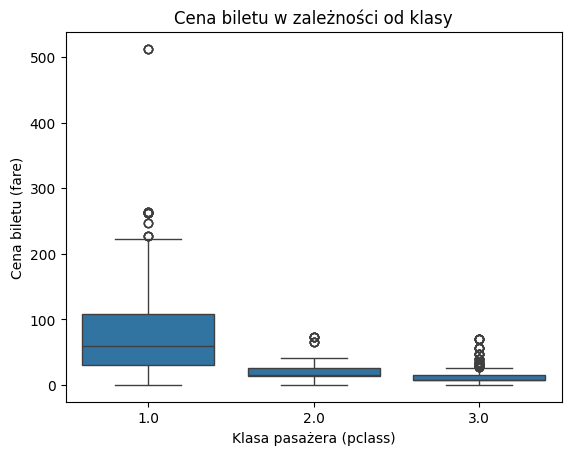

In [68]:

sns.boxplot(x='pclass', y='fare', data=df)
plt.xlabel('Klasa pasażera (pclass)')
plt.ylabel('Cena biletu (fare)')
plt.title('Cena biletu w zależności od klasy')
plt.show()

## widać na boxplocie kilku zarobasów, których bilety kosztowały najwięcej, poniżej sprawdźmy czy przeżyli

In [69]:
df_high_fare = df[df['fare'] >500]
df_high_fare.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
49,1.0,1.0,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0.0,1.0,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,1.0,1.0,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0.0,1.0,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
183,1.0,1.0,"Lesurer, Mr. Gustave J",male,35.0,0.0,0.0,PC 17755,512.3292,B101,C,3,NaN,NaN
302,1.0,1.0,"Ward, Miss. Anna",female,35.0,0.0,0.0,PC 17755,512.3292,NaN,C,3,NaN,NaN


### jak widać 100% przeżyło, pieniądze szcześcia nie dają ale otwierają wiele możliwości.

<div style="text-align: center;">

<div style= "font-weight:bold; font-size:28px; margin-bottom:15px;" >Rozkład kabin w Titanicu</div>

<img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEi5MupOJ12etxCCOUAF-P58C5JqBDv6JIBEkCLsdIzefSeYaDrVcdECNia9EPmBMNXFkG1jEwLRhVmFJdo-6nQWGJ4Un7_vhGBjmNzd1YYZ5bRzU7SnG0hyrI0sybZBapjPlvrRhDOoUtg/s1600/Titanic_side_plan_annotated_English.png" width=2000 /><br>
Po prawej stronie mamy opis "BOAT DECK" na którym widać oznaczenie pokładów. Im wyżej tym drożej...

</div>

### zobaczmy ogólnie jak się ma cena do przeżywalności

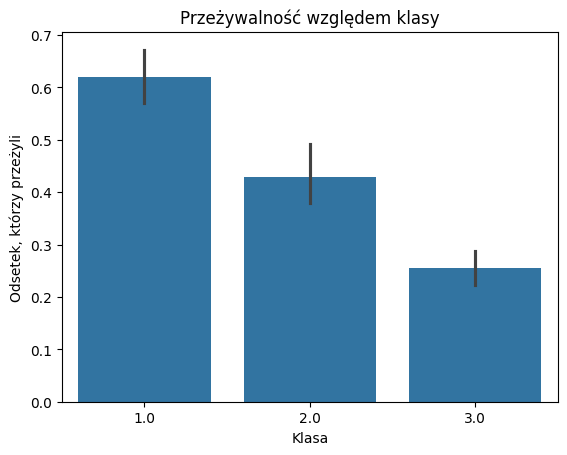

In [70]:

sns.barplot(x='pclass', y='survived', data=df)
plt.ylabel('Odsetek, którzy przeżyli')
plt.xlabel('Klasa')
plt.title('Przeżywalność względem klasy')
plt.show()

#### klasyka gatunku, im grubszy portfel tym więcej możliwości

### teraz sprawdźmy jak się ma oznaczenie pokładu do przeżycia...

C:\Users\pawlo\AppData\Local\Temp\ipykernel_6892\4041267364.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.0f}%'.format(y*100) for y in yticks])


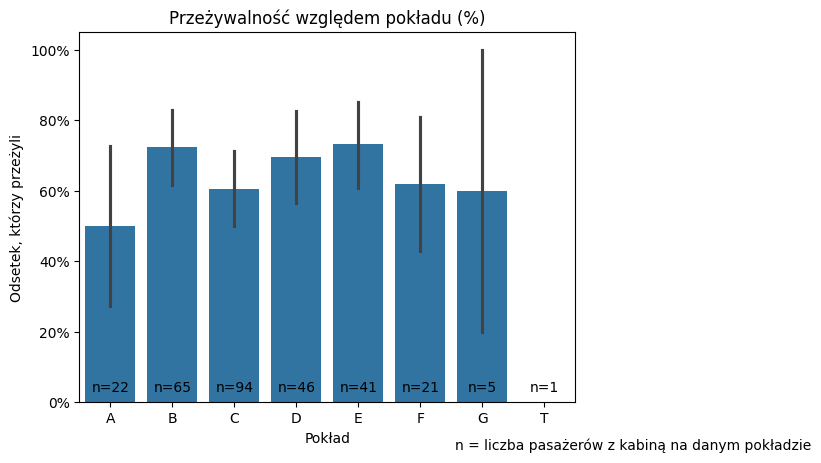

In [77]:

# Ustal alfabetyczny porządek pokładów (bez NaN)
deck_order = sorted(df['deck'].dropna().unique())

# Wykres z seaborn — wartości survived od razu mean (czyli procent)
ax = sns.barplot(x='deck', y='survived', data=df, order=deck_order)

# Oś Y: procenty
yticks = ax.get_yticks()
ax.set_yticklabels(['{:.0f}%'.format(y*100) for y in yticks])

plt.ylabel('Odsetek, którzy przeżyli')
plt.xlabel('Pokład')
plt.title('Przeżywalność względem pokładu (%)')

# Liczba biletów n
deck_counts = df['deck'].value_counts().reindex(deck_order)
for i, count in enumerate(deck_counts):
    ax.text(i, 0.02, f'n={count}', ha='center',
            va='bottom', color='black', fontsize=10)
plt.figtext(0.99, 0.01, "n = liczba pasażerów z kabiną na danym pokładzie",
            horizontalalignment='center', fontsize=10, color='black')
plt.show()

#### i tu niespodzianka. Niższe pokłady mają większą przeżywalność czego się nie spodziewałem, sprawdzmy więc rozkład kobiet, dzieci i mężczyzn w tych kabinach ponieważ podczas ewakuacji pierwszeństwo miały kobiety i dzieci.

In [97]:
# grupujemy po pokładzie i liczymy ilość osób, dorosłych mężczyzn, dorosłych kobiet i dzieci
def group_deck(df):
    return pd.Series({
        'liczba_osob': len(df),
        'dorosli_mezczyzni': ((df['sex'] == 'male') & (~df['is_child'])).sum(),
        'dorosle_kobiety': ((df['sex'] == 'female') & (~df['is_child'])).sum(),
        'dzieci': df['is_child'].sum()
    })

deck_summary = df.groupby('deck').apply(group_deck).sort_index()
deck_summary.reset_index(inplace=False)

,deck,liczba_osob,dorosli_mezczyzni,dorosle_kobiety,dzieci
0,A,22,17,4,1
1,B,65,27,34,4
2,C,94,47,45,2
3,D,46,23,23,0
4,E,41,20,19,2
5,F,21,10,6,5
6,G,5,0,2,3
7,T,1,1,0,0


#### sprawdźmy przeżywalność kobiet i dzieci na poszczególnych pokładach

In [120]:
def group_deck_survived(df_deck):
    # Dorośli: wiek >= 16
    dorosle_kobiety = ((df_deck['sex'] == 'female') & (~df_deck['is_child']))
    dorosli_mezczyzni = ((df_deck['sex'] == 'male') & (~df_deck['is_child']))
    dzieci = df_deck['is_child']
    przezyly_kobiety = (dorosle_kobiety & (df_deck['survived'] == 1)).sum()
    przezyli_mezczyzni = (dorosli_mezczyzni & (df_deck['survived'] == 1)).sum()
    przezylo_dzieci = (dzieci & (df_deck['survived'] == 1)).sum()
    return pd.Series({
        'liczba mężczyzn': dorosli_mezczyzni.sum(),
        'liczba ocalałych mężczyzn': przezyli_mezczyzni,
        'liczba kobiet': dorosle_kobiety.sum(),        
        'liczba ocalałych kobiet': przezyly_kobiety,
        'liczba dzieci': dzieci.sum(),
        'liczba ocalałych dzieci': przezylo_dzieci
    })


deck_survival = df.groupby('deck').apply(group_deck_survived).sort_index()

deck_survival['przeżywalność mężczyzn %'] = (
    deck_survival['liczba ocalałych mężczyzn'] /
    deck_survival['liczba mężczyzn'] * 100
)

deck_survival['przeżywalność kobiet %'] = (
    deck_survival['liczba ocalałych kobiet'] /
    deck_survival['liczba kobiet'] * 100
)
deck_survival['przeżywalność dzieci %'] = (
    deck_survival['liczba ocalałych dzieci'] /
    deck_survival['liczba dzieci'] * 100
)
pd.set_option('display.width', 250)
pd.set_option('display.max_columns', 20)
print(deck_survival)

      liczba mężczyzn  liczba ocalałych mężczyzn  liczba kobiet  liczba ocalałych kobiet  liczba dzieci  liczba ocalałych dzieci  przeżywalność mężczyzn %  przeżywalność kobiet %  przeżywalność dzieci %
deck                                                                                                                                                                                                      
A                  17                          7              4                        3              1                        1                 41.176471               75.000000              100.000000
B                  27                          9             34                       34              4                        4                 33.333333              100.000000              100.000000
C                  47                         14             45                       42              2                        1                 29.787234               93.333333          

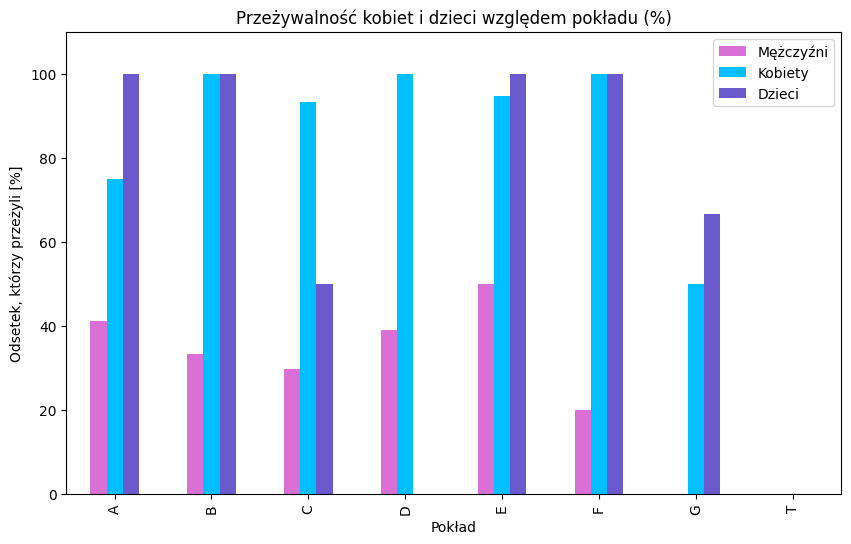

In [125]:

deck_survival[['przeżywalność mężczyzn %', 'przeżywalność kobiet %', 'przeżywalność dzieci %']].plot(
    kind='bar', figsize=(10, 6), color=['orchid', 'deepskyblue', 'slateblue']
)
plt.ylabel('Odsetek, którzy przeżyli [%]')
plt.xlabel('Pokład')
plt.title('Przeżywalność kobiet i dzieci względem pokładu (%)')
plt.legend(['Mężczyźni','Kobiety', 'Dzieci' ])
plt.ylim(0, 110)
plt.show()

#### widać w tamtych czasach było dużo dżentelmenów albo dużo brytyjczyków na statku